#Penguins Clustering

#Import Modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
import warnings

warnings.filterwarnings('ignore')

##Data Loading

In [2]:
df = pd.read_csv('penguins.csv')
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...
339,NaN,NaN,NaN,NaN,NaN
340,46.8,14.3,215.0,4850.0,FEMALE
341,50.4,15.7,222.0,5750.0,MALE
342,45.2,14.8,212.0,5200.0,FEMALE


##Exploratory Data Analysis

In [3]:
# Get Dataframe Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   342 non-null    float64
 1   culmen_depth_mm    342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   sex                335 non-null    object 
dtypes: float64(4), object(1)
memory usage: 13.6+ KB


In [4]:
# Get Dataframe Statistic Parameters
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,214.014620,4201.754386
std,5.459584,1.974793,260.558057,801.954536
min,32.100000,13.100000,-132.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.750000,4750.000000
max,59.600000,21.500000,5000.000000,6300.000000


In [5]:
# Count Missing Values
df.isna().sum()

,0
culmen_length_mm,2
culmen_depth_mm,2
flipper_length_mm,2
body_mass_g,2
sex,9


In [6]:
# Count Duplicated Values
df.duplicated().sum()

np.int64(1)

In [7]:
# Get Numeric Featres
numeric_features = df.select_dtypes(include='number').columns

In [8]:
# Drop Missing Values
df.dropna(inplace=True)

In [9]:
# Drop Duplicates
df.drop_duplicates(inplace=True)

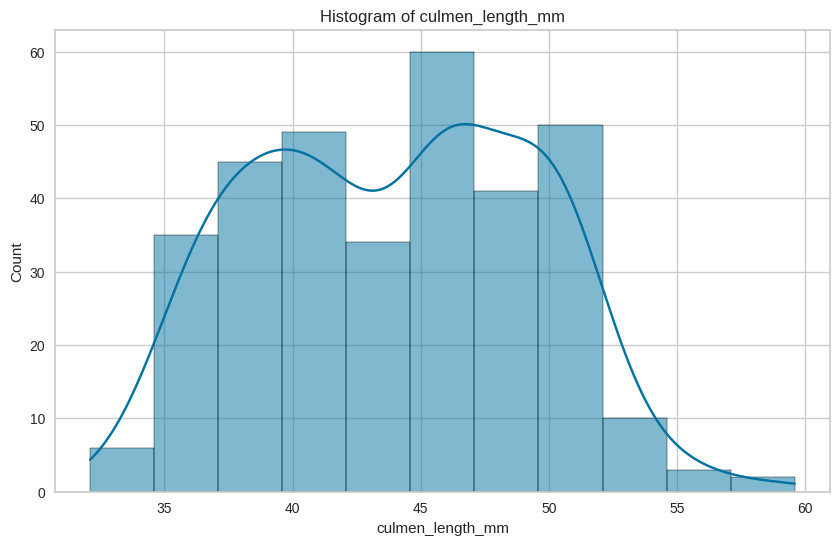

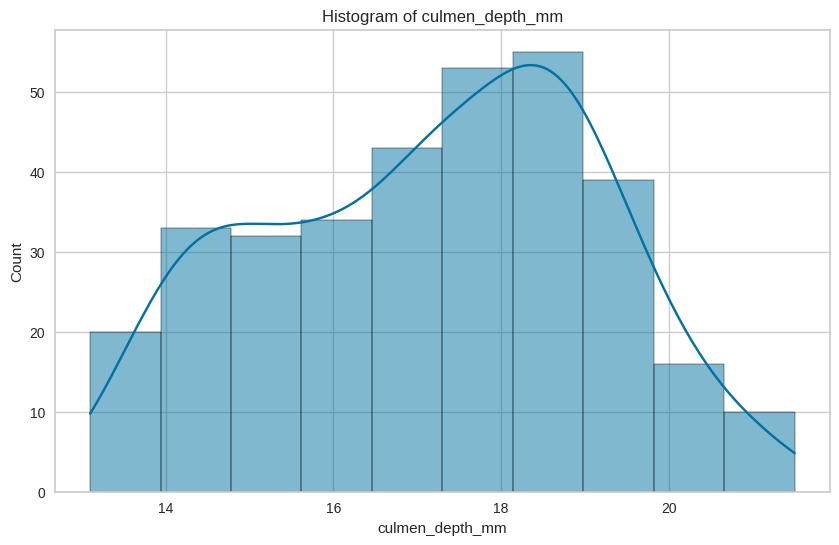

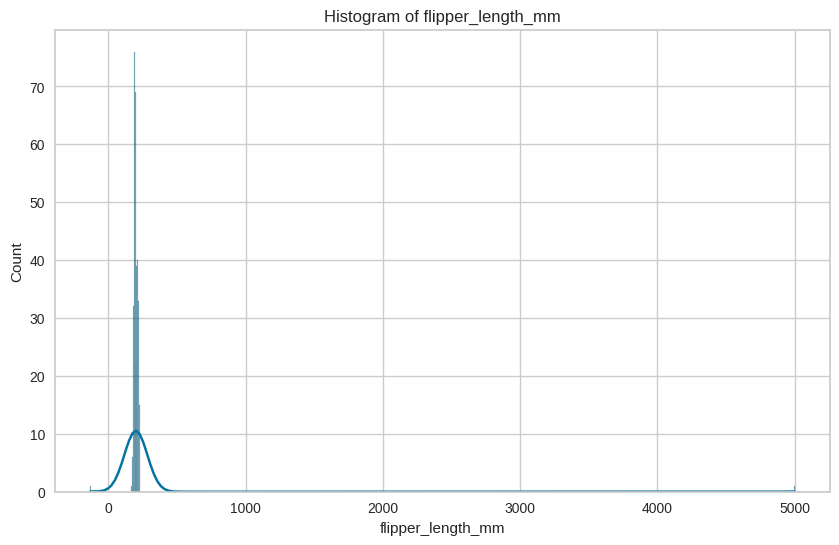

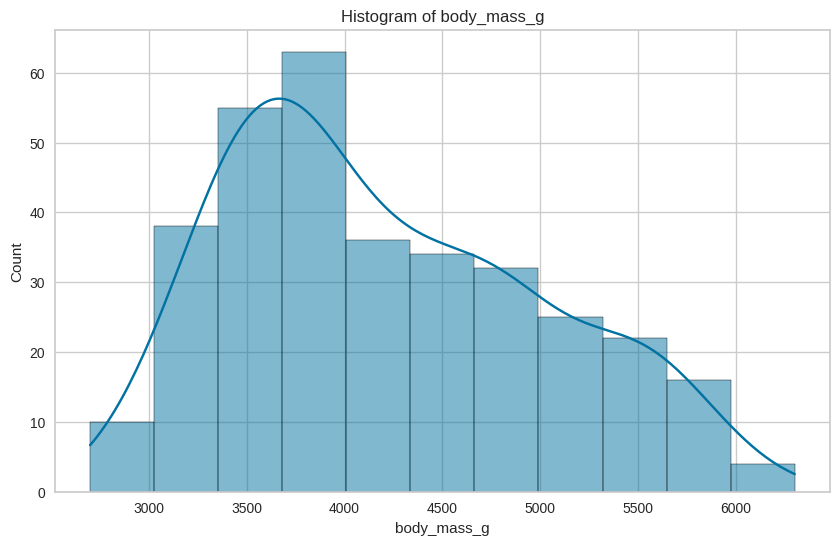

In [10]:
# Histplot

for i in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.histplot(df[i], kde=True)
  plt.title(f'Histogram of {i}')
  plt.show()

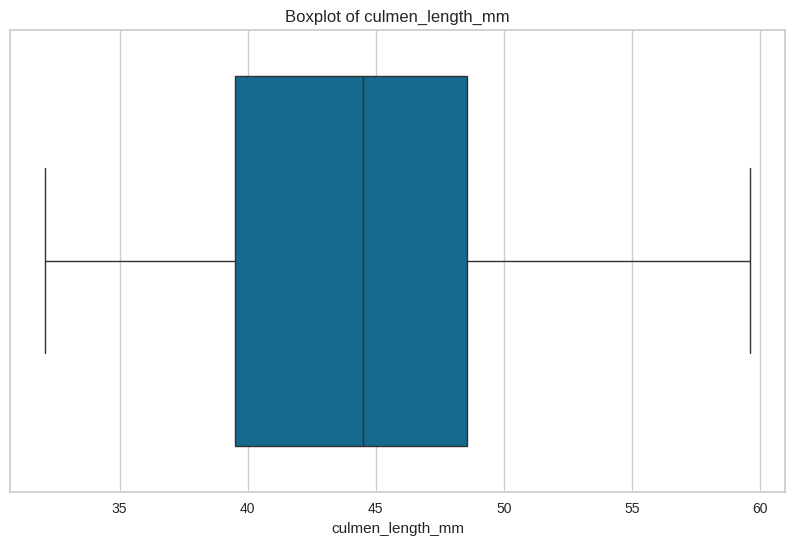

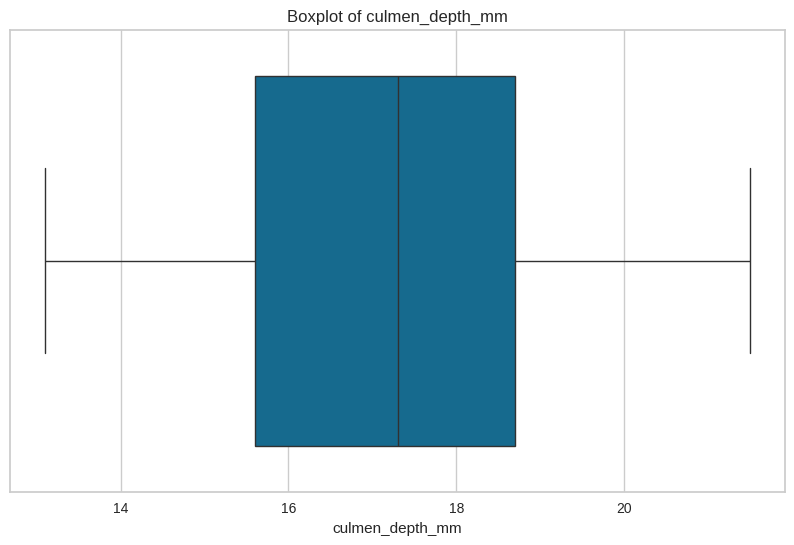

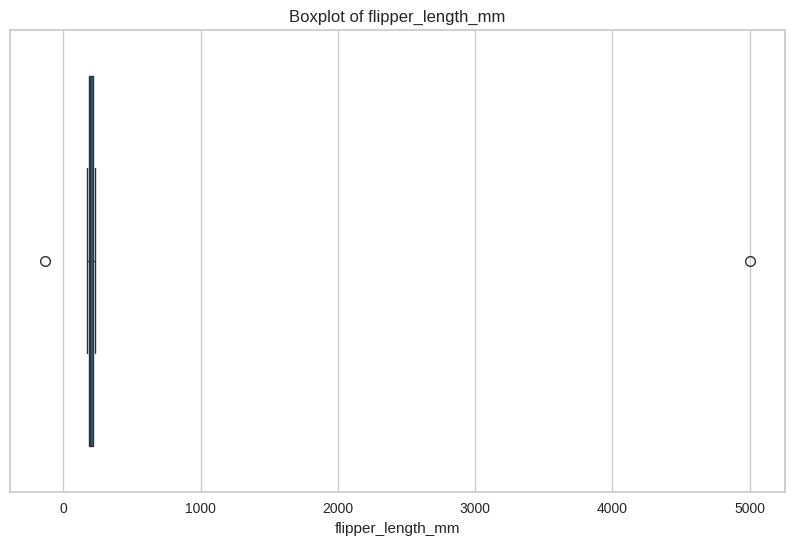

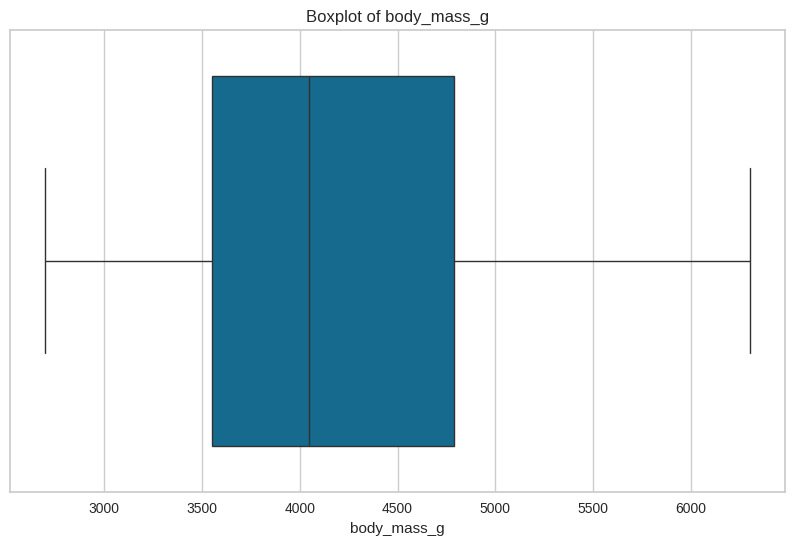

In [11]:
# Boxplot

for i in numeric_features:
  plt.figure(figsize=(10, 6))
  sns.boxplot(x= df[i])
  plt.title(f'Boxplot of {i}')
  plt.show()

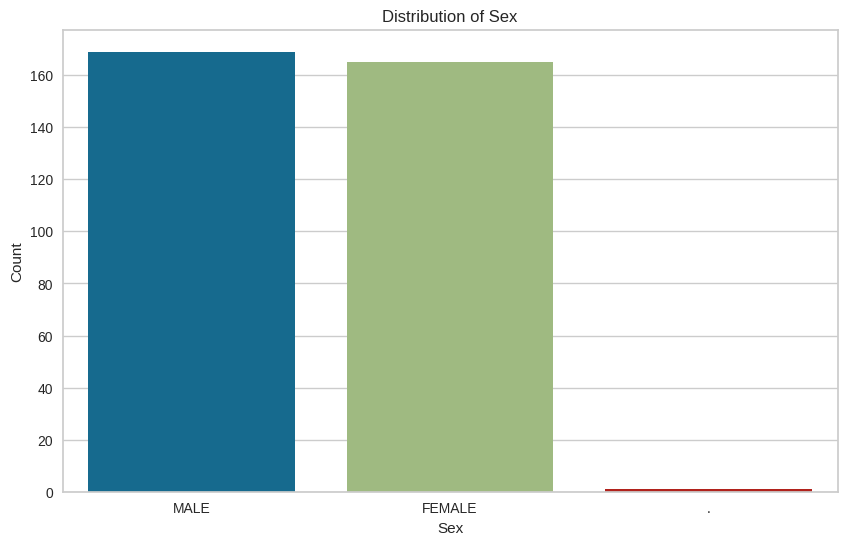

In [12]:
# Distribution of Sex

plt.figure(figsize=(10, 6))
sns.countplot(x=df['sex'], hue=df['sex'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [13]:
# Inaccurate Values
inc_val = df[(df['sex'] != 'MALE') & (df['sex'] != 'FEMALE')]
inc_val

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,44.5,15.7,217.0,4875.0,.


In [14]:
# Drop Inaccurate Values
df.drop(inc_val.index, inplace=True)

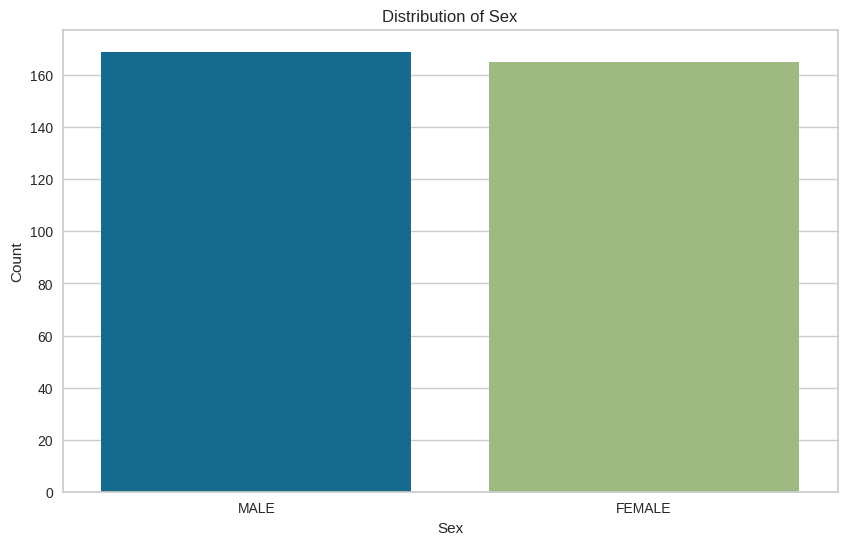

In [15]:
# Distribution of Sex After Cleaning

plt.figure(figsize=(10, 6))
sns.countplot(x=df['sex'], hue=df['sex'])
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

##Data Preprocessing

In [16]:
# Remove Outliers

for i in numeric_features:
  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3-Q1
  upper = Q3 + 1.5 * IQR
  lower = Q1 - 1.5 * IQR

  outliers = df[(df[i] > upper) | (df[i] < lower)]
  df.drop(outliers.index, inplace=True)

In [17]:
# Encode Categoric Data

df = pd.get_dummies(df, columns=['sex'])

In [18]:
df

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,39.1,18.7,181.0,3750.0,False,True
1,39.5,17.4,186.0,3800.0,True,False
2,40.3,18.0,195.0,3250.0,True,False
4,36.7,19.3,193.0,3450.0,True,False
5,39.3,20.6,190.0,3650.0,False,True
...,...,...,...,...,...,...
338,47.2,13.7,214.0,4925.0,True,False
340,46.8,14.3,215.0,4850.0,True,False
341,50.4,15.7,222.0,5750.0,False,True
342,45.2,14.8,212.0,5200.0,True,False


In [19]:
# Standarized Numeric Data
scaler = StandardScaler()
X = scaler.fit_transform(df)
X = pd.DataFrame(X, columns = df.columns)

In [20]:
X

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_FEMALE,sex_MALE
0,-0.903906,0.790360,-1.425342,-0.566948,-0.993994,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,1.006042,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,1.006042,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,1.006042,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,-0.993994,0.993994
...,...,...,...,...,...,...
327,0.583904,-1.764152,0.929309,0.892415,1.006042,-1.006042
328,0.510432,-1.457611,1.000662,0.799264,1.006042,-1.006042
329,1.171681,-0.742347,1.500134,1.917074,-0.993994,0.993994
330,0.216543,-1.202160,0.786603,1.233968,1.006042,-1.006042


# Model Building

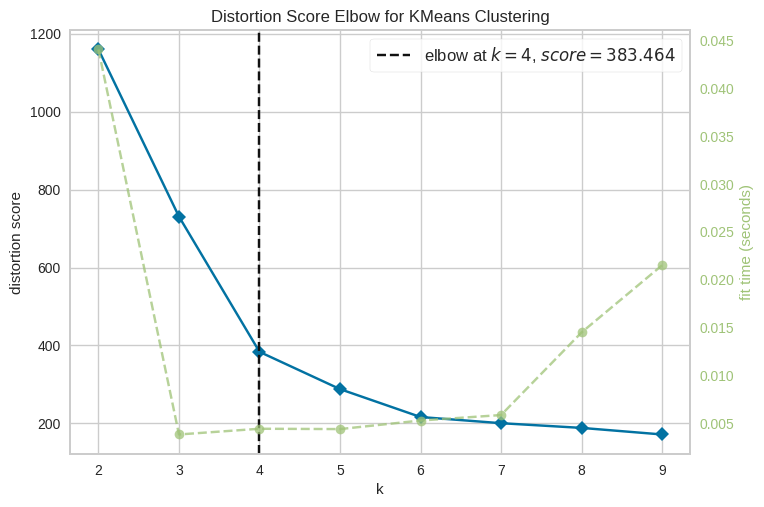

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
# Finding Optimal Cluster
model = KMeans()

visualizer = KElbowVisualizer(model, k=(2, 10))

visualizer.fit(X)
visualizer.show()

In [22]:
# Building KMeans Model

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=4, random_state=42)

In [23]:
# Get The Labels
labels = kmeans.labels_

In [24]:
# Evaluating using Silhouette Score

score = silhouette_score(X, labels)
print(f'Score: {score}')

Score: 0.5744211864819234


##Feature Selection PCA

In [25]:
# Feature Selection Using PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(X)

In [26]:
# Training Model using PCA

kmeans_pca = KMeans(n_clusters=4, random_state=42)
kmeans_pca.fit(x_pca)

labels_pca = kmeans_pca.labels_

In [27]:
# Evaluate using Silhouette Score

score_pca = silhouette_score(x_pca, labels_pca)
print(f'Score: {score_pca}')

Score: 0.7421034438118217


#Cluster Visualization

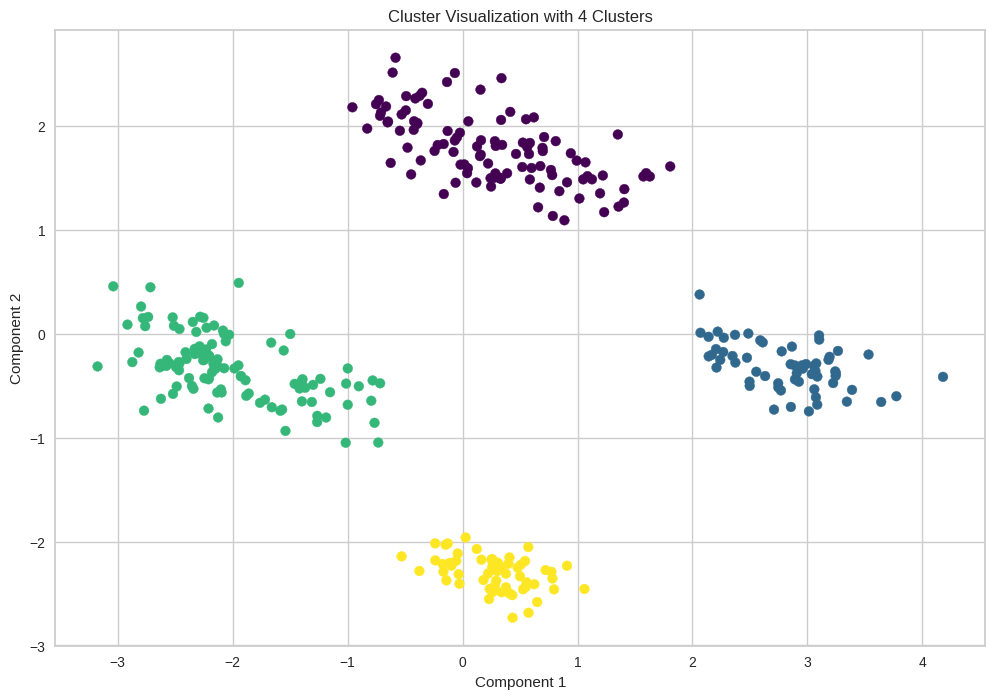

In [28]:
plt.figure(figsize=(12, 8))
plt.scatter(x_pca[:,0], x_pca[:,1], c=labels_pca, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Cluster Visualization with 4 Clusters')
plt.show()